In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
from sklearn.preprocessing import MultiLabelBinarizer
import math  

In [2]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn import metrics
from sklearn.model_selection import train_test_split
from matplotlib import cm
import numpy as np
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer 

from sklearn.metrics.pairwise import cosine_similarity

from bokeh.io import show, curdoc, output_notebook, push_notebook
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, HoverTool, Select, Paragraph, TextInput
from bokeh.layouts import widgetbox, column, row
from ipywidgets import interact


from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn import metrics
from sklearn.model_selection import train_test_split
from matplotlib import cm

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer 

import markovify
import string

from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


from sklearn.pipeline import Pipeline

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression

import warnings; warnings.simplefilter('ignore')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/harshini/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/harshini/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/harshini/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
from sklearn.metrics import classification_report

In [4]:
df = pd.read_csv(r"../data/cosmetic_preprocess.csv");

In [5]:
df.head(10)

,Label,Name,brand,price,rank,ingredients,Combination,Dry,Mature,Normal,Oil,Sensitive
0,moisturizer,The Dewy Skin Cream Plumping & Hydrating Moist...,Tatcha,69,4.0,"Aqua/Water/Eau, Saccharomyces/Camellia Sinensi...",0,1,0,1,0,0
1,moisturizer,Revealer Skin-Improving Foundation SPF25 with ...,Kosas,42,4.0,"Zinc Oxide (7.5%), Water, Ethylhexyl Olivate, ...",1,1,0,1,1,0
2,moisturizer,Plum Plump Hyaluronic Acid Moisturizer,Glow Recipe,39,4.5,"Water/Aqua/Eau, Propanediol, Glycerin, C13-15 ...",1,1,0,1,1,0
3,moisturizer,The Water Cream Oil-Free Pore Minimizing Moist...,Tatcha,69,4.0,"Water, Saccharomyces/Camellia Sinensis Leaf/Cl...",1,1,0,1,1,0
4,moisturizer,Barrier+ Triple Lipid-Peptide Face Cream,Skinfix,52,4.5,"Water/Eau/Aqua, Caprylic/Capric Triglyceride, ...",0,1,0,1,1,0
5,moisturizer,Vitamin Enriched Face Base Priming Moisturizer,Bobbi Brown,64,4.5,"Water, Cyclopentasiloxane, Bis-Diglyceryl Poly...",1,0,0,1,1,0
6,moisturizer,Ultra Repair® Cream Intense Hydration,First Aid Beauty,38,4.5,"Colloidal Oatmeal 0.50%, Water, Stearic Acid, ...",1,1,0,1,0,0
7,moisturizer,CC+ Nude Glow Lightweight Foundation + Glow Se...,IT Cosmetics,42,4.5,"Aqua / Water / Eau, Glycerin, Homosalate, Octo...",1,1,0,1,0,0
8,moisturizer,Turn Up the Base Beauty Blur Balm Hybrid Found...,ONE/SIZE by Patrick Starrr,33,4.5,"Water (Aqua/Eau), Caprylyl Methicone, Syntheti...",1,1,0,1,1,0
9,moisturizer,Cicapair™ Tiger Grass Color Correcting Treatme...,Dr. Jart+,52,4.0,"Water, Centella asiatica Leaf Water, Isononyl ...",1,1,0,1,1,0


<AxesSubplot:xlabel='rank', ylabel='price'>

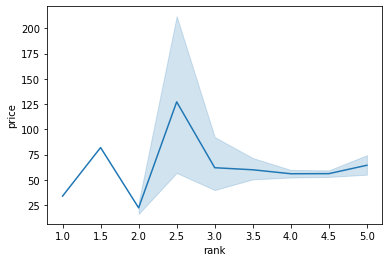

In [6]:
sns.lineplot(data=df, x="rank", y="price")

<AxesSubplot:xlabel='price'>

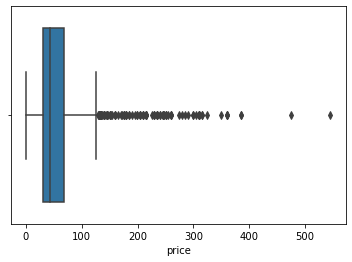

In [7]:
sns.boxplot(data=df,x='price', width=.8)

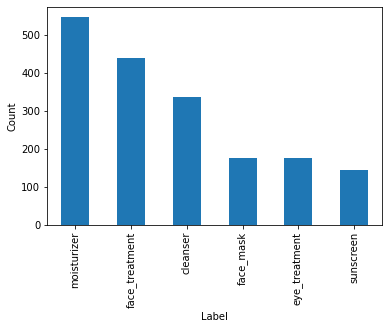

In [8]:

data = df['Label'].value_counts()
type(data)
data.plot.bar()
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

# Analysis between Label and Skin type

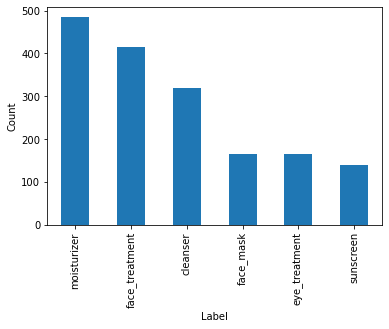

In [9]:
data = df['Label'][df['Combination']==1].value_counts()
type(data)
data.plot.bar()
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

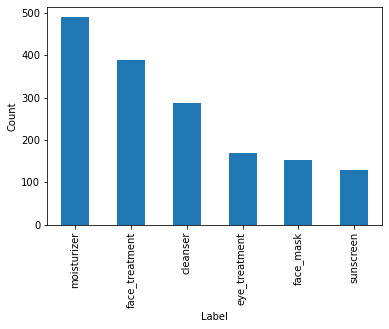

In [10]:
data = df['Label'][df['Dry']==1].value_counts()
type(data)
data.plot.bar()
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

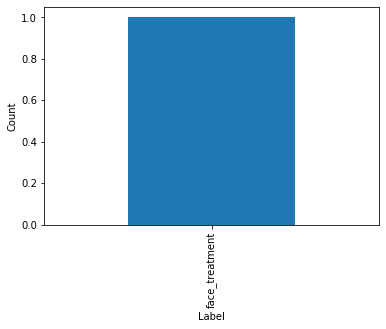

In [11]:
data = df['Label'][df['Mature']==1].value_counts()
type(data)
data.plot.bar()
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

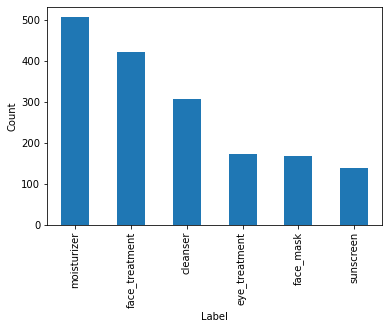

In [12]:
data = df['Label'][df['Normal']==1].value_counts()
type(data)
data.plot.bar()
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

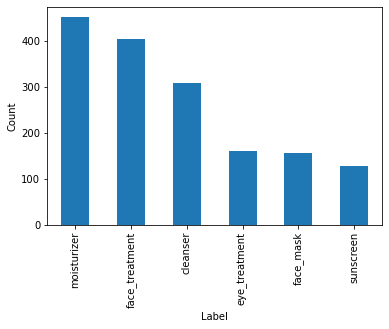

In [13]:
data = df['Label'][df['Oil']==1].value_counts()
type(data)
data.plot.bar()
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

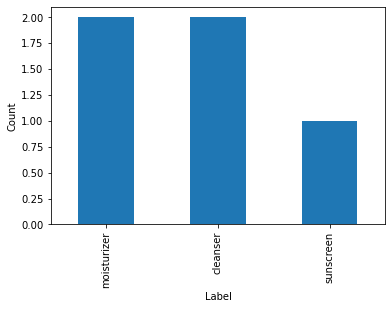

In [14]:
data = df['Label'][df['Sensitive']==1].value_counts()
type(data)
data.plot.bar()
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

# NLP: wordclouds and classification

In [15]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [16]:
stopwords = set(STOPWORDS)
stopwords.update(['read', 'more', 'product'])

In [17]:
def generate_wordcloud(data):
    wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(data)

    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

In [18]:
moist_df = df[df.Name == 'Moisturizer']
cleanse_df = df[df.Name == 'Cleanser']
mask_df = df[df.Name == 'Face Mask']
treat_df = df[df.Name == 'Treatment']

In [19]:
moist = " ".join(ing for ing in moist_df.Name)
cleanse = " ".join(ing for ing in cleanse_df.ingredients)
mask = " ".join(ing for ing in mask_df.ingredients)
treat = " ".join(ing for ing in treat_df.ingredients)

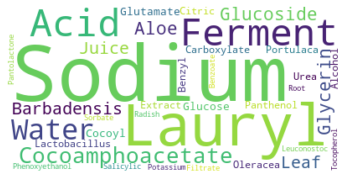

In [20]:
generate_wordcloud(cleanse)

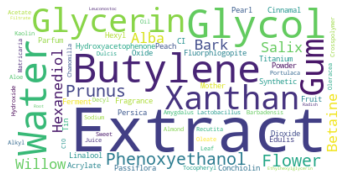

In [21]:
generate_wordcloud(mask)

# Latent Dirichlet Allocation

Now that we know that different skincare categories are distinguishable, it would be interesting to use unsupervised clustering to figure out how the ingredients would group naturally.

Latent Dirichlet Allocation (LDA) is an example of topic model and is used to classify text in a document to a particular topic. It builds a topic per document model and words per topic model, modeled as Dirichlet distributions.

In [22]:
from __future__ import print_function
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [23]:
ing_raw = df.ingredients

In [24]:
tf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                                stop_words = 'english',
                                lowercase = True,
                                token_pattern = r'\b[a-zA-Z]{3,}\b',
                                max_df = 0.5, 
                                min_df = 10)
dtm_tf = tf_vectorizer.fit_transform(ing_raw)

In [25]:
tfidf_vectorizer = TfidfVectorizer(**tf_vectorizer.get_params())
dtm_tfidf = tfidf_vectorizer.fit_transform(ing_raw)

In [26]:
lda_tf = LatentDirichletAllocation(n_components=4, random_state=0)
lda_tf.fit(dtm_tf)
# for TFIDF DTM
lda_tfidf = LatentDirichletAllocation(n_components=4, random_state=0)
lda_tfidf.fit(dtm_tfidf)

LatentDirichletAllocation(n_components=4, random_state=0)

In [27]:
pyLDAvis.sklearn.prepare(lda_tf, dtm_tf, tf_vectorizer)

/Users/harshini/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/harshini/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/harshini/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/harshini/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/harshini/opt/anaconda3/lib/python3.9/site-packages/past/b

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.048350 -0.026488       1        1  36.473563
2      0.102675 -0.125795       2        1  23.200923
3     -0.179767  0.024466       3        1  21.954619
1      0.125442  0.127816       4        1  18.370895, topic_info=            Term         Freq        Total Category  logprob  loglift
463        fruit  1737.000000  1737.000000  Default  30.0000  30.0000
368  dimethicone  1146.000000  1146.000000  Default  29.0000  29.0000
900          peg  1179.000000  1179.000000  Default  28.0000  28.0000
273       citrus   721.000000   721.000000  Default  27.0000  27.0000
456       flower  1108.000000  1108.000000  Default  26.0000  26.0000
..           ...          ...          ...      ...      ...      ...
916    phosphate   112.380744   376.347590   Topic4  -5.1931   0.4858
991    propylene   101.977147   235.910092   Topic4  -5.2903   0.8557
298    copolymer   114.645897   640.680624   Topic4  -5.1732  -0.0263
395          eau   114.055806   730.215048   Topic4  -5.1783  -0.1622
502     glyceryl   112.738952   919.148185   Topic4  -5.1899  -0.4040

[339 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
4         3  0.988192      acer
6         4  0.991036   acerosa
7         1  0.335960   acetate
7         2  0.263227   acetate
7         3  0.116027   acetate
...     ...       ...       ...
1291      1  0.089023    yellow
1291      2  0.118698    yellow
1291      3  0.118698    yellow
1291      4  0.675093    yellow
1296      2  0.966572  ziziphus

[637 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 3, 4, 2])

In [29]:
X1 = df.ingredients
y1 = df.Combination
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.25, random_state = 42)

In [30]:
cat = ['1', '0']

In [31]:
nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train1, y_train1)

y_pred1 = nb.predict(X_test1)

print('accuracy %s' % accuracy_score(y_pred1, y_test1))
print(classification_report(y_test1, y_pred1, target_names=cat))

accuracy 0.9074889867841409
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        42
           0       0.91      1.00      0.95       412

    accuracy                           0.91       454
   macro avg       0.45      0.50      0.48       454
weighted avg       0.82      0.91      0.86       454



In [32]:
#Logistic Regression
logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=1, C=1e5)),
               ])
logreg.fit(X_train1, y_train1)


y_pred1 = logreg.predict(X_test1)

print('accuracy %s' % accuracy_score(y_pred1, y_test1))
print(classification_report(y_test1, y_pred1, target_names=cat))

accuracy 0.9162995594713657
              precision    recall  f1-score   support

           1       0.75      0.14      0.24        42
           0       0.92      1.00      0.96       412

    accuracy                           0.92       454
   macro avg       0.83      0.57      0.60       454
weighted avg       0.90      0.92      0.89       454

